In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\franc\OneDrive - Politecnico di Milano\POLIMI\Data Intelligence Applications\Prove\DIAForm2.csv")
data.columns = ['Date', 'Age', 'Sex', 'AW', 'WS0', 'WS10', 'WS20', 'WS50']

In [24]:
print(data.head())

                  Date  Age      Sex  AW WS0 WS10 WS20 WS50
0  26/03/2021 21.50.20   23  Maschio  Sì  No   Sì  NaN  NaN
1  26/03/2021 21.50.46   23  Femmina  No  No   No   No   No
2  26/03/2021 21.50.50   23  Maschio  Sì  No   No   Sì  NaN
3  26/03/2021 21.50.58   23  Femmina  Sì  No   No   No   Sì
4  26/03/2021 21.55.34   24  Femmina  No  No   Sì  NaN  NaN


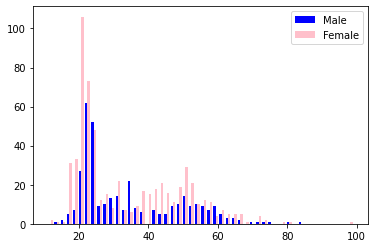

In [25]:
AgeM = data.Age[data.Sex == 'Maschio']
AgeF = data.Age[data.Sex == 'Femmina']

bins = 50
plt.hist([AgeM, AgeF], bins, label=['Male', 'Female'], color=['Blue', 'Pink'])
plt.legend(loc='upper right')
plt.show()

In [26]:
# Total number of people
N = len(data.Date)
N

968

In [27]:
# Number of people that buy item 1
ni1 = data.Date[data.AW == 'Sì'].count()
nNOi1 = data.Date[data.AW == 'No'].count()
ni1
nNOi1

# P(buy item 1) = i1
i1 = ni1 / N
i1

0.4369834710743802

In [28]:
# Number of people that buy item 2 + P3
ni2_p3 = data.Date[data.WS50 == 'Sì'].count()
ni2_p3

# P(buy item 2 + P3) = i2_p3
i2_p3 = ni2_p3 / N
i2_p3


# Number of people that buy item 2  + P3 | buy item 1
ni21_p3 = data.Date[(data.WS50 == 'Sì') & (data.AW == 'Sì')].count()
ni21_p3

# P(buy item 2 + P3 | buy item 1) = i21_p3
i21_p3 = ni21_p3 / ni1
i21_p3



0.2907801418439716

In [29]:
# Number of people that buy item 2 + P2
ni2_p2 = data.Date[data.WS20 == 'Sì'].count()
ni2_p2

# P(buy item 2 + P2) = i2_p2
i2_p2 = (ni2_p2 + ni2_p3) / N
i2_p2


# Number of people that buy item 2  + P2 | buy item 1
ni21_p2 = data.Date[(data.WS20 == 'Sì') & (data.AW == 'Sì')].count()
ni21_p2

# P(buy item 2 + P2 | buy item 1) = i21_p2
i21_p2 = (ni21_p2 + ni21_p3) / ni1
i21_p2


0.3262411347517731

In [30]:
# Number of people that buy item 2 + P1
ni2_p1 = data.Date[data.WS10 == 'Sì'].count()
ni2_p1

# P(buy item 2 + P1) = i2_p1
i2_p1 = (ni2_p1 + ni2_p2 + ni2_p3) / N
i2_p1


# Number of people that buy item 2  + P1 | buy item 1
ni21_p1 = data.Date[(data.WS10 == 'Sì') & (data.AW == 'Sì')].count()
ni21_p1

# P(buy item 2 + P1 | buy item 1) = i21_p1
i21_p1 = (ni21_p1 + ni21_p2 + ni21_p3) / ni1
i21_p1


0.38534278959810875

In [31]:
# Number of people that buy item 2 (or buy item 2 + P0)
ni2_p0 = data.Date[data.WS0 == 'Sì'].count()
ni2_p0

# P(buy item 2 + P0) = P(buy item 2) = i2_p0
i2_p0 = (ni2_p0 + ni2_p1 + ni2_p2 + ni2_p3) / N
i2_p0


# Number of people that buy item 2 (or buy item 2 + P0) | buy item 1
ni21_p0 = data.Date[(data.WS0 == 'Sì') & (data.AW == 'Sì')].count()
ni21_p0

# P(buy item 2 | item 1 + P0) = P(buy item 2 | item 1) = i21_p0
i21_p0 = (ni21_p0 + ni21_p1 + ni21_p2 + ni21_p3) / ni1
i21_p0




0.789598108747045

CLASSES

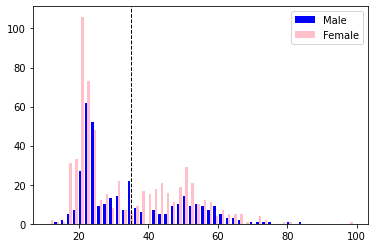

In [32]:
AgeM = data.Age[data.Sex == 'Maschio']
AgeF = data.Age[data.Sex == 'Femmina']

bins = 50
plt.hist([AgeM, AgeF], bins, label=['Male', 'Female'], color=['Blue', 'Pink'])
plt.legend(loc='upper right')
plt.axvline(35, color='k', linestyle='dashed', linewidth=1)
plt.show()

In [33]:
# Classes
c1 = data[(data.Sex == 'Femmina') & (data.Age <= 35)]
c2 = data[(data.Sex == 'Maschio') & (data.Age <= 35)]
c3 = data[(data.Sex == 'Femmina') & (data.Age > 35)]
c4 = data[(data.Sex == 'Maschio') & (data.Age > 35)]


In [34]:
# Total number of people
N1 = len(c1.Date)
N1

N2 = len(c2.Date)
N2

N3 = len(c3.Date)
N3

N4 = len(c4.Date)
N4


127

In [35]:
# Number of people of class c1 that buy item 1
nc1_i1 = c1.Date[c1.AW == 'Sì'].count()
nc1_i1
nc2_i1 = c2.Date[c2.AW == 'Sì'].count()
nc2_i1
nc3_i1 = c3.Date[c3.AW == 'Sì'].count()
nc3_i1
nc4_i1 = c4.Date[c4.AW == 'Sì'].count()
nc4_i1

# P(buy item 1) = i1
c1_i1 = nc1_i1 / N1
c1_i1
c2_i1 = nc2_i1 / N2
c2_i1
c3_i1 = nc3_i1 / N3
c3_i1
c4_i1 = nc4_i1 / N4
c4_i1


0.3700787401574803

In [36]:
# Number of people that buy item 2 + P3
nc1_i2_p3 = c1.Date[c1.WS50 == 'Sì'].count()
nc1_i2_p3
nc2_i2_p3 = c2.Date[c2.WS50 == 'Sì'].count()
nc2_i2_p3
nc3_i2_p3 = c3.Date[c3.WS50 == 'Sì'].count()
nc3_i2_p3
nc4_i2_p3 = c4.Date[c4.WS50 == 'Sì'].count()
nc4_i2_p3

# P(buy item 2 + P3) = i2_p3
c1_i2_p3 = nc1_i2_p3 / N1
c1_i2_p3
c2_i2_p3 = nc2_i2_p3 / N2
c2_i2_p3
c3_i2_p3 = nc3_i2_p3 / N3
c3_i2_p3
c4_i2_p3 = nc4_i2_p3 / N4
c4_i2_p3


# Number of people that buy item 2  + P3 | buy item 1
nc1_i21_p3 = c1.Date[(c1.WS50 == 'Sì') & (c1.AW == 'Sì')].count()
nc1_i21_p3
nc2_i21_p3 = c2.Date[(c2.WS50 == 'Sì') & (c2.AW == 'Sì')].count()
nc2_i21_p3
nc3_i21_p3 = c3.Date[(c3.WS50 == 'Sì') & (c3.AW == 'Sì')].count()
nc3_i21_p3
nc4_i21_p3 = c4.Date[(c4.WS50 == 'Sì') & (c4.AW == 'Sì')].count()
nc4_i21_p3

# P(buy item 2 + P3 | buy item 1) = i21_p3
c1_i21_p3 = nc1_i21_p3 / nc1_i1
c1_i21_p3
c2_i21_p3 = nc2_i21_p3 / nc2_i1
c2_i21_p3
c3_i21_p3 = nc3_i21_p3 / nc3_i1
c3_i21_p3
c4_i21_p3 = nc4_i21_p3 / nc4_i1
c4_i21_p3



0.2553191489361702

In [37]:
# Number of people that buy item 2 + P2
nc1_i2_p2 = c1.Date[c1.WS20 == 'Sì'].count()
nc1_i2_p2
nc2_i2_p2 = c2.Date[c2.WS20 == 'Sì'].count()
nc2_i2_p2
nc3_i2_p2 = c3.Date[c3.WS20 == 'Sì'].count()
nc3_i2_p2
nc4_i2_p2 = c4.Date[c4.WS20 == 'Sì'].count()
nc4_i2_p2

# P(buy item 2 + P2) = i2_p2
c1_i2_p2 = (nc1_i2_p2 + nc1_i2_p3) / N1
c1_i2_p2
c2_i2_p2 = (nc2_i2_p2 + nc2_i2_p3) / N2
c2_i2_p2
c3_i2_p2 = (nc3_i2_p2 + nc3_i2_p3) / N3
c3_i2_p2
c4_i2_p2 = (nc4_i2_p2 + nc4_i2_p3) / N4
c4_i2_p2


# Number of people that buy item 2  + P2 | buy item 1
nc1_i21_p2 = c1.Date[(c1.WS20 == 'Sì') & (c1.AW == 'Sì')].count()
nc1_i21_p2
nc2_i21_p2 = c2.Date[(c2.WS20 == 'Sì') & (c2.AW == 'Sì')].count()
nc2_i21_p2
nc3_i21_p2 = c3.Date[(c3.WS20 == 'Sì') & (c3.AW == 'Sì')].count()
nc3_i21_p2
nc4_i21_p2 = c4.Date[(c4.WS20 == 'Sì') & (c4.AW == 'Sì')].count()
nc4_i21_p2

# P(buy item 2 + P2 | buy item 1) = i21_p2
c1_i21_p2 = (nc1_i21_p2 + nc1_i21_p3) / nc1_i1
c1_i21_p2
c2_i21_p2 = (nc2_i21_p2 + nc2_i21_p3) / nc2_i1
c2_i21_p2
c3_i21_p2 = (nc3_i21_p2 + nc3_i21_p3) / nc3_i1
c3_i21_p2
c4_i21_p2 = (nc4_i21_p2 + nc4_i21_p3) / nc4_i1
c4_i21_p2


0.2765957446808511

In [38]:
# Number of people that buy item 2 + P1
nc1_i2_p1 = c1.Date[c1.WS10 == 'Sì'].count()
nc1_i2_p1
nc2_i2_p1 = c2.Date[c2.WS10 == 'Sì'].count()
nc2_i2_p1
nc3_i2_p1 = c3.Date[c3.WS10 == 'Sì'].count()
nc3_i2_p1
nc4_i2_p1 = c4.Date[c4.WS10 == 'Sì'].count()
nc4_i2_p1


# P(buy item 2 + P1) = i2_p1
c1_i2_p1 = (nc1_i2_p1 + nc1_i2_p2 + nc1_i2_p3) / N1
c1_i2_p1
c2_i2_p1 = (nc2_i2_p1 + nc2_i2_p2 + nc2_i2_p3) / N2
c2_i2_p1
c3_i2_p1 = (nc3_i2_p1 + nc3_i2_p2 + nc3_i2_p3) / N3
c3_i2_p1
c4_i2_p1 = (nc4_i2_p1 + nc4_i2_p2 + nc4_i2_p3) / N4
c4_i2_p1


# Number of people that buy item 2  + P1 | buy item 1
nc1_i21_p1 = c1.Date[(c1.WS10 == 'Sì') & (c1.AW == 'Sì')].count()
nc1_i21_p1
nc2_i21_p1 = c2.Date[(c2.WS10 == 'Sì') & (c2.AW == 'Sì')].count()
nc2_i21_p1
nc3_i21_p1 = c3.Date[(c3.WS10 == 'Sì') & (c3.AW == 'Sì')].count()
nc3_i21_p1
nc4_i21_p1 = c4.Date[(c4.WS10 == 'Sì') & (c4.AW == 'Sì')].count()
nc4_i21_p1

# P(buy item 2 + P1 | buy item 1) = i21_p1
c1_i21_p1 = (nc1_i21_p1 + nc1_i21_p2 + nc1_i21_p3) / nc1_i1
c1_i21_p1
c2_i21_p1 = (nc2_i21_p1 + nc2_i21_p2 + nc2_i21_p3) / nc2_i1
c2_i21_p1
c3_i21_p1 = (nc3_i21_p1 + nc3_i21_p2 + nc3_i21_p3) / nc3_i1
c3_i21_p1
c4_i21_p1 = (nc4_i21_p1 + nc4_i21_p2 + nc4_i21_p3) / nc4_i1
c4_i21_p1


0.2978723404255319

In [39]:
# Number of people that buy item 2 (or buy item 2 + P0)
nc1_i2_p0 = c1.Date[c1.WS0 == 'Sì'].count()
nc1_i2_p0
nc2_i2_p0 = c2.Date[c2.WS0 == 'Sì'].count()
nc2_i2_p0
nc3_i2_p0 = c3.Date[c3.WS0 == 'Sì'].count()
nc3_i2_p0
nc4_i2_p0 = c4.Date[c4.WS0 == 'Sì'].count()
nc4_i2_p0

# P(buy item 2 + P0) = P(buy item 2) = i2_p0
c1_i2_p0 = (nc1_i2_p0 + nc1_i2_p1 + nc1_i2_p2 + nc1_i2_p3) / N1
c1_i2_p0
c2_i2_p0 = (nc2_i2_p0 + nc2_i2_p1 + nc2_i2_p2 + nc2_i2_p3) / N2
c2_i2_p0
c3_i2_p0 = (nc3_i2_p0 + nc3_i2_p1 + nc3_i2_p2 + nc3_i2_p3) / N3
c3_i2_p0
c4_i2_p0 = (nc4_i2_p0 + nc4_i2_p1 + nc4_i2_p2 + nc4_i2_p3) / N4
c4_i2_p0


# Number of people that buy item 2 (or buy item 2 + P0) | buy item 1
nc1_i21_p0 = c1.Date[(c1.WS0 == 'Sì') & (c1.AW == 'Sì')].count()
nc1_i21_p0
nc2_i21_p0 = c2.Date[(c2.WS0 == 'Sì') & (c2.AW == 'Sì')].count()
nc2_i21_p0
nc3_i21_p0 = c3.Date[(c3.WS0 == 'Sì') & (c3.AW == 'Sì')].count()
nc3_i21_p0
nc4_i21_p0 = c4.Date[(c4.WS0 == 'Sì') & (c4.AW == 'Sì')].count()
nc4_i21_p0

# P(buy item 2 | item 1 + P0) = P(buy item 2 | item 1) = i21_p0
c1_i21_p0 = (nc1_i21_p0 + nc1_i21_p1 + nc1_i21_p2 + nc1_i21_p3) / nc1_i1
c1_i21_p0
c2_i21_p0 = (nc2_i21_p0 + nc2_i21_p1 + nc2_i21_p2 + nc2_i21_p3) / nc2_i1
c2_i21_p0
c3_i21_p0 = (nc3_i21_p0 + nc3_i21_p1 + nc3_i21_p2 + nc3_i21_p3) / nc3_i1
c3_i21_p0
c4_i21_p0 = (nc4_i21_p0 + nc4_i21_p1 + nc4_i21_p2 + nc4_i21_p3) / nc4_i1
c4_i21_p0


0.5957446808510638

MATRICES

In [40]:
# Matrix P = probabilities (row promo / column classes)

P = np.array([[c1_i21_p0, c2_i21_p0, c3_i21_p0, c4_i21_p0],
              [c1_i21_p1, c2_i21_p1, c3_i21_p1, c4_i21_p1],
              [c1_i21_p2, c2_i21_p2, c3_i21_p2, c4_i21_p2],
              [c1_i21_p3, c2_i21_p3, c3_i21_p3, c4_i21_p3]])
P

array([[0.83060109, 0.77380952, 0.81651376, 0.59574468],
       [0.3715847 , 0.36904762, 0.4587156 , 0.29787234],
       [0.32240437, 0.28571429, 0.3853211 , 0.27659574],
       [0.27868852, 0.25      , 0.35779817, 0.25531915]])

In [41]:
# CONSIDERING ALL CUSTOMERS, ALSO WHO DON'T BUY ITEM 1

PALL = np.array([[c1_i2_p0, c2_i2_p0, c3_i2_p0, c4_i2_p0],
              [c1_i2_p1, c2_i2_p1, c3_i2_p1, c4_i2_p1],
              [c1_i2_p2, c2_i2_p2, c3_i2_p2, c4_i2_p2],
              [c1_i2_p3, c2_i2_p3, c3_i2_p3, c4_i2_p3]])
PALL

array([[0.75890411, 0.60606061, 0.60816327, 0.44094488],
       [0.41643836, 0.38961039, 0.35918367, 0.27559055],
       [0.36438356, 0.34632035, 0.31428571, 0.2519685 ],
       [0.31780822, 0.31601732, 0.28571429, 0.22834646]])

In [46]:

# Matrix nP = number of customers considered (row promo / column classes)

nP = np.array([[nc1_i21_p0, nc2_i21_p0, nc3_i21_p0, nc4_i21_p0],
              [nc1_i21_p1, nc2_i21_p1, nc3_i21_p1, nc4_i21_p1],
              [nc1_i21_p2, nc2_i21_p2, nc3_i21_p2, nc4_i21_p2],
              [nc1_i21_p3, nc2_i21_p3, nc3_i21_p3, nc4_i21_p3]])
nP

# To check that che sum are correct
np.sum(nP) + data.Date[(data.AW == "Sì") & (data.WS50 == "No")].count() == data.Date[data.AW == "Sì"].count()

True

In [48]:
# CONSIDERING ALL CUSTOMERS, ALSO WHO DON'T BUY ITEM 1

nPALL = np.array([[nc1_i2_p0, nc2_i2_p0, nc3_i2_p0, nc4_i2_p0],
              [nc1_i2_p1, nc2_i2_p1, nc3_i2_p1, nc4_i2_p1],
              [nc1_i2_p2, nc2_i2_p2, nc3_i2_p2, nc4_i2_p2],
              [nc1_i2_p3, nc2_i2_p3, nc3_i2_p3, nc4_i2_p3]])
nPALL

# To check that che sum are correct
np.sum(nPALL) + data.Date[data.WS50 == "No"].count() == data.Date.count()


True

In [44]:
# Array c = number of customers [c1, c2, c3, c4]

c = np.array([N1, N2, N3, N4])
c


array([365, 231, 245, 127])